# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This project involves scraping data from the website https://www.exchange-rates.org/exchange-rate-history/usd-idr, which provides historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD). The scraped data will be visualized on a Flask-based dashboard. The data to be visualized includes the highest, lowest, and average exchange rates each month over the 180-day period from March 4, 2024, to August 30, 2024.

This notebook outlines the steps for performing web scraping using BeautifulSoup and creating data visualizations on a Flask dashboard. The steps are described as follows:

1. Requesting the Data and Creating a BeautifulSoup Object:
Making a request to the target URL and creating a BeautifulSoup object for parsing the HTML content.

2. Finding the Key Data & Extracting the Right Information:
Identifying the correct HTML elements that contain the historical exchange rate data and extracting the information into structured formats like lists or dictionaries.

3. Creating a DataFrame & Data Wrangling:
    a. Putting the Array into a DataFrame: Transforming the extracted data into a Pandas DataFrame for further manipulation.
    b. Data Cleaning and Wrangling: Cleaning the raw data by handling missing values, converting data types, and performing any necessary transformations.
    c. Initial Data Visualization using Matplotlib: Visualizing preliminary results such as the highest, lowest, and average exchange rates for the scraped data.
    d. Implementing Web Scraping on the Flask Dashboard: Integrating the web scraping process into a Flask dashboard that displays the visualized data dynamically.

4. Analysis and Conclusion:
Drawing insights from the visualizations and data, concluding on the observed trends in the USD to IDR exchange rates over the selected period.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <base href="https://www.exchange-rates.org/"/>
    <meta content="Explore US Dollar (USD) to Indonesian Rupiah (IDR) historical exchange rates at Exchange-Rates.org. Access detailed data and charts to analyze past currency trends and fluctuations." name="description"/>
    <meta content="" name="keywords"/>
    <meta content="https://www.exchange-rates.org/exchange-rate-history/usd-idr" property="og:url"/>
    <meta content="website" property="og:type"/>
    <m

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*

In [5]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30">
    <span class="nowrap">
     2024-8-30
    </span>
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30">
    <span class="nowrap">
     2024-8-30
    </span>
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     1 USD =
    </span>
    <span class="nowrap">
     15,532 IDR
    </span>
   </span>
   <span class="n">
    <span class="nowrap">
     1 USD =
    </span>
   


Next, we need to find the row length.

In [6]:
table_exc_rates = table.find_all('a', attrs= {'class':'w'} )
#table_exc_rates
row_length = len(table_exc_rates)
row_length

130

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get tanggal 
   tanggal = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get kurs
   kurs = table.find_all('span', attrs={'class':'w'})[i].text
       
   temp.append((tanggal, kurs))
    
temp 

[('2024-8-30', '1 USD = 15,532 IDR'),
 ('2024-8-29', '1 USD = 15,466 IDR'),
 ('2024-8-28', '1 USD = 15,446 IDR'),
 ('2024-8-27', '1 USD = 15,481 IDR'),
 ('2024-8-26', '1 USD = 15,483 IDR'),
 ('2024-8-23', '1 USD = 15,401 IDR'),
 ('2024-8-22', '1 USD = 15,751 IDR'),
 ('2024-8-21', '1 USD = 15,508 IDR'),
 ('2024-8-20', '1 USD = 15,449 IDR'),
 ('2024-8-19', '1 USD = 15,530 IDR'),
 ('2024-8-16', '1 USD = 15,698 IDR'),
 ('2024-8-15', '1 USD = 15,773 IDR'),
 ('2024-8-14', '1 USD = 15,634 IDR'),
 ('2024-8-13', '1 USD = 15,756 IDR'),
 ('2024-8-12', '1 USD = 15,948 IDR'),
 ('2024-8-9', '1 USD = 15,950 IDR'),
 ('2024-8-8', '1 USD = 15,985 IDR'),
 ('2024-8-7', '1 USD = 16,030 IDR'),
 ('2024-8-6', '1 USD = 16,175 IDR'),
 ('2024-8-5', '1 USD = 16,222 IDR'),
 ('2024-8-2', '1 USD = 16,176 IDR'),
 ('2024-8-1', '1 USD = 16,275 IDR'),
 ('2024-7-31', '1 USD = 16,251 IDR'),
 ('2024-7-30', '1 USD = 16,326 IDR'),
 ('2024-7-29', '1 USD = 16,297 IDR'),
 ('2024-7-26', '1 USD = 16,304 IDR'),
 ('2024-7-25', '1 U

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

In [8]:
#reverses the order of dates from past time to recent time
temp = temp[::-1]
temp

[('2024-3-4', '1 USD = 15,760 IDR'),
 ('2024-3-5', '1 USD = 15,743 IDR'),
 ('2024-3-6', '1 USD = 15,660 IDR'),
 ('2024-3-7', '1 USD = 15,627 IDR'),
 ('2024-3-8', '1 USD = 15,541 IDR'),
 ('2024-3-11', '1 USD = 15,525 IDR'),
 ('2024-3-12', '1 USD = 15,560 IDR'),
 ('2024-3-13', '1 USD = 15,580 IDR'),
 ('2024-3-14', '1 USD = 15,638 IDR'),
 ('2024-3-15', '1 USD = 15,647 IDR'),
 ('2024-3-18', '1 USD = 15,742 IDR'),
 ('2024-3-19', '1 USD = 15,723 IDR'),
 ('2024-3-20', '1 USD = 15,697 IDR'),
 ('2024-3-21', '1 USD = 15,727 IDR'),
 ('2024-3-22', '1 USD = 15,814 IDR'),
 ('2024-3-25', '1 USD = 15,784 IDR'),
 ('2024-3-26', '1 USD = 15,821 IDR'),
 ('2024-3-27', '1 USD = 15,901 IDR'),
 ('2024-3-28', '1 USD = 15,891 IDR'),
 ('2024-3-29', '1 USD = 15,880 IDR'),
 ('2024-4-1', '1 USD = 15,951 IDR'),
 ('2024-4-2', '1 USD = 15,952 IDR'),
 ('2024-4-3', '1 USD = 15,942 IDR'),
 ('2024-4-4', '1 USD = 15,896 IDR'),
 ('2024-4-5', '1 USD = 15,888 IDR'),
 ('2024-4-8', '1 USD = 15,912 IDR'),
 ('2024-4-9', '1 USD = 

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [9]:
import pandas as pd
import matplotlib as plt

kurs_rate = pd.DataFrame(temp, columns=('date','kurs'))
kurs_rate.head()

,date,kurs
0,2024-3-4,"1 USD = 15,760 IDR"
1,2024-3-5,"1 USD = 15,743 IDR"
2,2024-3-6,"1 USD = 15,660 IDR"
3,2024-3-7,"1 USD = 15,627 IDR"
4,2024-3-8,"1 USD = 15,541 IDR"


### Data Cleansing



In [10]:
# Check initial data types
print(kurs_rate.dtypes)

date    object
kurs    object
dtype: object


In [33]:
# Create DataFrame
kurs_rate = pd.DataFrame(temp, columns=['date', 'kurs'])

# Ensure 'kurs' column is of type string before cleaning
kurs_rate['kurs'] = kurs_rate['kurs'].astype(str)

# Clean 'kurs' column by removing 'USD', 'IDR', and commas
kurs_rate['kurs'] = kurs_rate['kurs'].str.replace('1 USD = ', '', regex=False)
kurs_rate['kurs'] = kurs_rate['kurs'].str.replace(' IDR', '', regex=False)
kurs_rate['kurs'] = kurs_rate['kurs'].str.replace(',', '', regex=False)

# Convert 'kurs' column to float type
kurs_rate['kurs'] = kurs_rate['kurs'].astype('float64')

# Convert 'date' column to datetime type
kurs_rate['date'] = pd.to_datetime(kurs_rate['date'])

# Set 'date' as index
kurs_rate = kurs_rate.set_index('date')

# Check data types after conversion
print(kurs_rate.dtypes)

# Display the cleaned DataFrame
print(kurs_rate)

kurs    float64
dtype: object
               kurs
date               
2024-03-04  15760.0
2024-03-05  15743.0
2024-03-06  15660.0
2024-03-07  15627.0
2024-03-08  15541.0
...             ...
2024-08-26  15483.0
2024-08-27  15481.0
2024-08-28  15446.0
2024-08-29  15466.0
2024-08-30  15532.0

[130 rows x 1 columns]


### Data Visualization

Data yang diambil dari webscrapping merupakan data time-series dimana data kurs $ ke Rp di-update setiap hari. oleh karena itu, visualisasi yang menggambarkan time-series ini yaitu diagram `line` dimana untuk fungsi dari `.plot()` secara default merupakan diagram line.

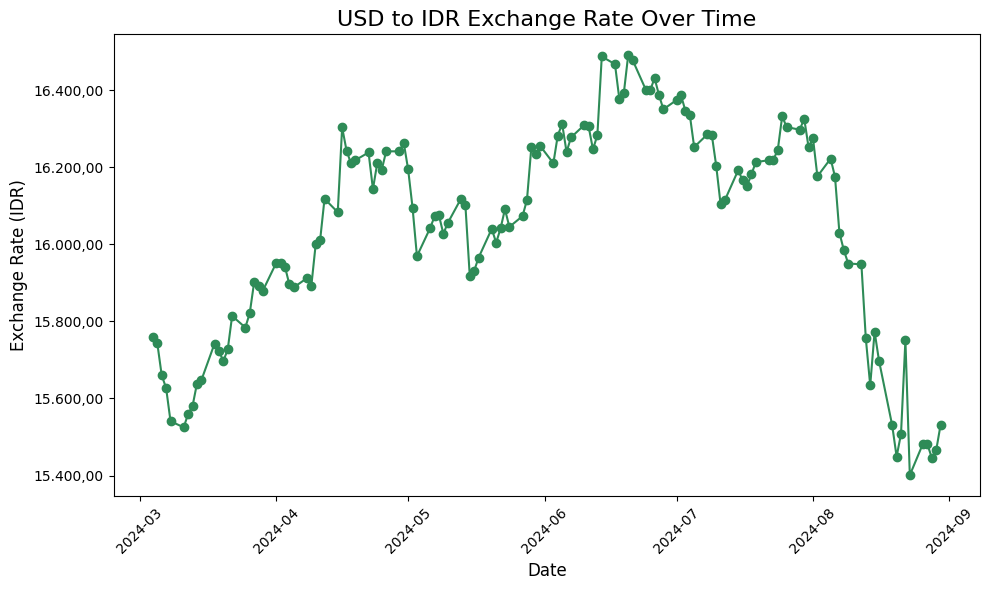

In [41]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Line plot for the exchange rate over time
plt.plot(kurs_rate.index, kurs_rate['kurs'], marker='o', color='seagreen')

# Adding title and labels
plt.title('USD to IDR Exchange Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rate (IDR)', fontsize=12)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Define a custom formatter function for the y-axis
def currency_formatter(x, pos):
    # Format as thousands with dots and 2 decimal places
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\alifia.rahayu.MEGAINS\AppData\Local\Temp\ipykernel_56524\2677052742.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tab = kurs_rate.resample('M').agg(['max', 'min', 'mean'])


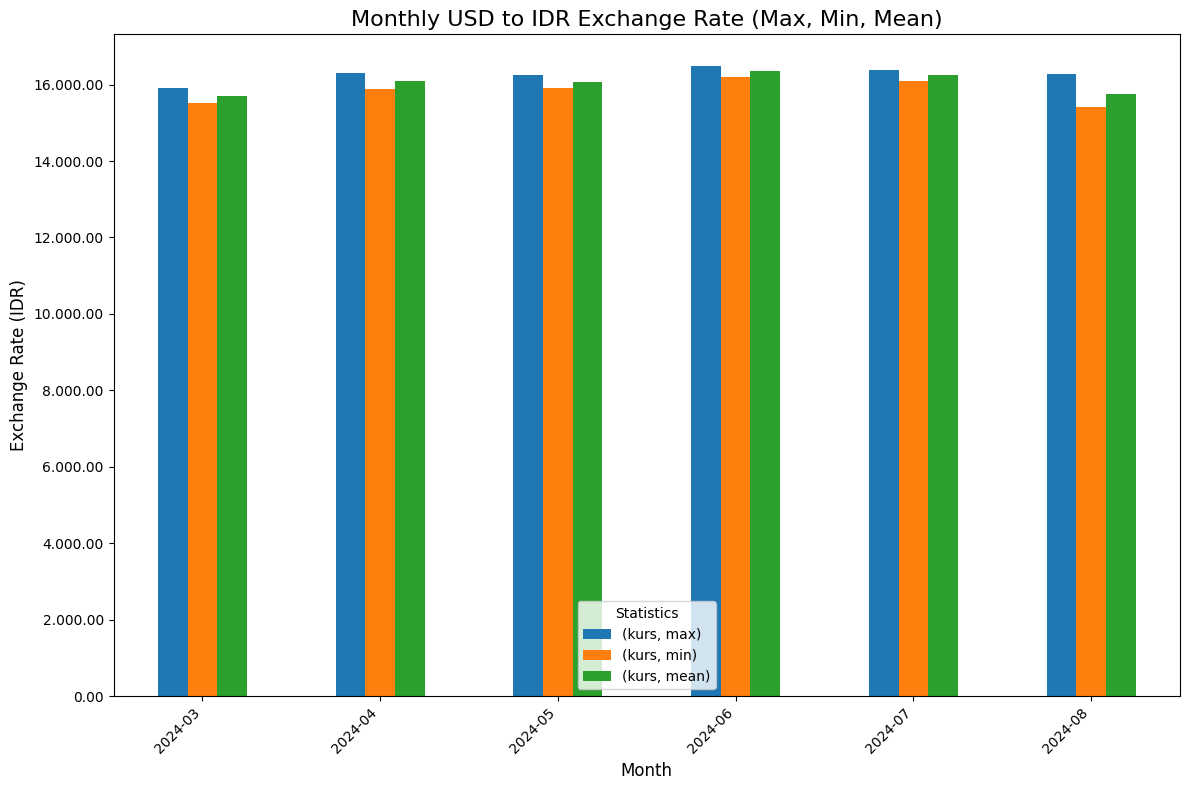

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Resample the data by month and calculate max, min, and mean
df_tab = kurs_rate.resample('M').agg(['max', 'min', 'mean'])

# Plotting the bar chart for max, min, and mean exchange rates per month
ax = df_tab.plot(kind='bar', figsize=(12, 8))

# Adding labels and title
plt.title('Monthly USD to IDR Exchange Rate (Max, Min, Mean)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Exchange Rate (IDR)', fontsize=12)

# Format x-axis to show only year and month
ax.set_xticks(range(len(df_tab)))
ax.set_xticklabels(df_tab.index.strftime('%Y-%m'), rotation=45, ha='right')

# Format y-axis to show 2 decimal places and thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', '.')))

plt.legend(title='Statistics')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

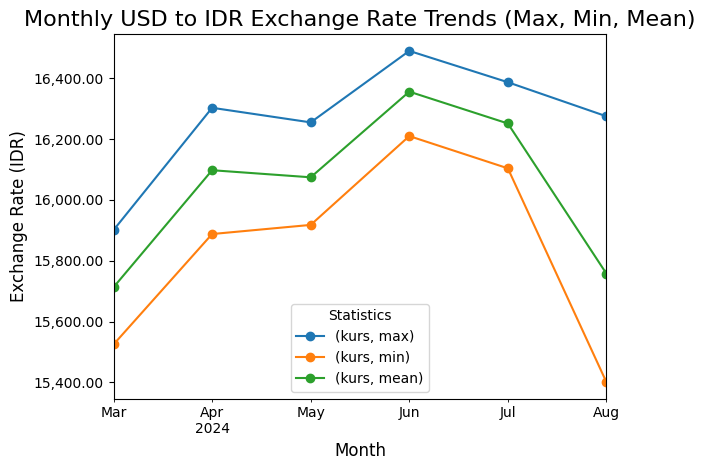

In [43]:
# Plotting the line plot for max, min, and mean exchange rates per month
plt.figure(figsize=(12, 8))
df_tab.plot(marker='o')

# Adding labels and title
plt.title('Monthly USD to IDR Exchange Rate Trends (Max, Min, Mean)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Exchange Rate (IDR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Statistics')

# Define a custom formatter function for the y-axis
def currency_formatter(x, pos):
    return f'{x:,.2f}'.replace(',', '.').replace('.', ',', 1)  # Thousands separator is dot, decimal is comma

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
# Check df_tab structure
df_tab

kurs                       
                max      min          mean
date                                      
2024-03-31  15901.0  15525.0  15713.050000
2024-04-30  16303.0  15888.0  16097.772727
2024-05-31  16255.0  15918.0  16074.478261
2024-06-30  16490.0  16210.0  16356.050000
2024-07-31  16387.0  16104.0  16251.391304
2024-08-31  16275.0  15401.0  15757.681818

After analyzing the USD to IDR exchange rates from March 4th, 2024 to August 30th, 2024, based on data obtained from https://www.exchange-rates.org/exchange-rate-history/usd-idr, we have the following key conclusions:

1. Maximum Exchange Rate: The highest recorded exchange rate during this period was IDR 16,490.00, observed in June 2024.
2. Minimum Exchange Rate: The lowest recorded exchange rate was IDR 15,401.00, observed in August 2024.
3. Highest Average Exchange Rate: The average exchange rate was highest in June 2024, with an average of IDR 16,356.05.
4. Lowest Average Exchange Rate: The average exchange rate was lowest in August 2024, with an average of IDR 15,757.68.

These conclusions highlight significant fluctuations in the exchange rates during the specified period, with notable peaks in June and troughs in August.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.